In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Loading the New Customer Data from the excel file

new_cust = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')

In [3]:
# Checking first 5 records from New Customer Data

new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [4]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

<b>The data-types of the feature columns are fine. However 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.</b>

## Total Records

In [5]:
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


## Numeric Columns and Non-Numeric Columns

In [6]:
# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


## 1. Dropping Irrelevent Columns

<b>'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.<b>

In [7]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

## 2. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [8]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [9]:
# Percentage of missing values
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

### 2.1 Last Name

<b>Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None"</b>

In [11]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [10]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [12]:
new_cust['last_name'].fillna('None',axis=0, inplace=True)

In [13]:
new_cust['last_name'].isnull().sum()

0

Currently there are no missing values for Last Name column.

### 2.2 Date of Birth

In [14]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [15]:
round(new_cust['DOB'].isnull().mean()*100)

2.0

<b>Less than 5 % of data has null date of birth. we can remove the records where date of birth is null</b>

In [16]:
# Fetching the index of the records / rows where the DOB is null.

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Int64Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775,
            835, 883, 904, 984],
           dtype='int64')

In [17]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)

In [18]:
new_cust['DOB'].isnull().sum()

0

Currently there are no missing values for DOB.

### Creating Age Column for checking further descripency in data

In [19]:
# Function to find the age of customers as of today.

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)

<b>Descriptive Statistics of Age column</b>

In [45]:
new_cust['Age'].describe()

count    983.000000
mean      49.581892
std       17.052487
min       19.000000
25%       38.000000
50%       49.000000
75%       63.000000
max       82.000000
Name: Age, dtype: float64

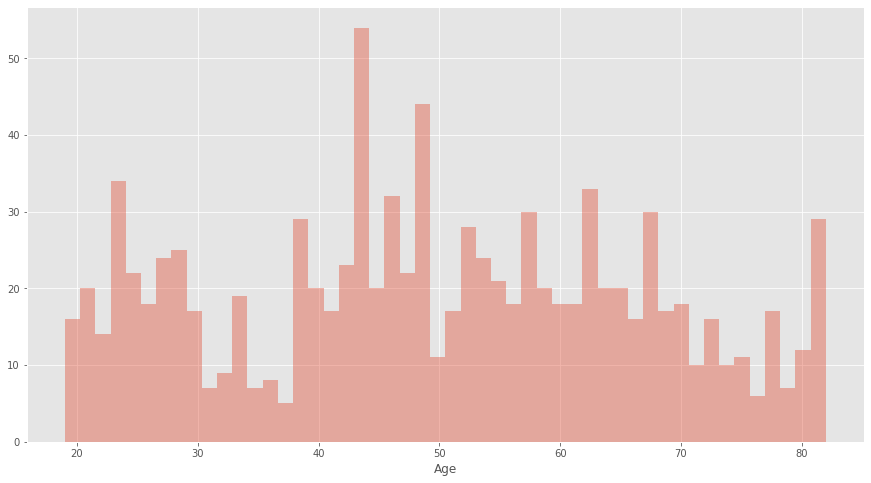

In [43]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

<b>Looking at the age field there is no descripency in the data</b>

### Creating Age Group Column

In [22]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

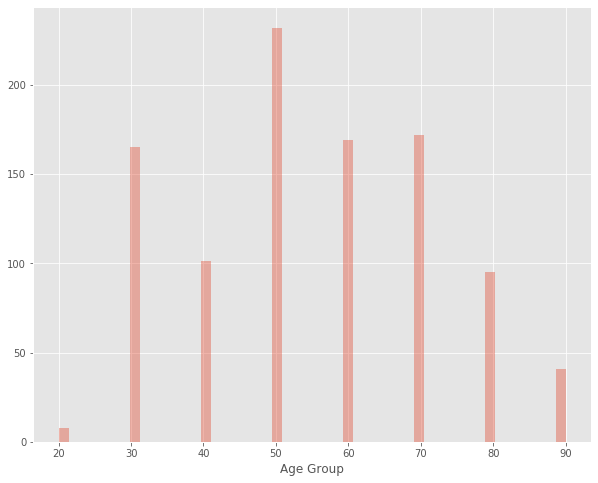

In [48]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=50)

<b>The highest number of New Customers are from the Age Group 50-59.</b>

### 2.3 Job Title

In [23]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,67,70
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,75,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,60,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,41,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,42,50
38,Garik,Whitwell,Male,44,1955-06-13,NaN,Property,Mass Customer,N,Yes,13,04 Dexter Way,3280,VIC,Australia,2,38,1.437500,65,70
39,Antonin,Britt,Male,64,1993-08-28,NaN,Manufacturing,Affluent Customer,N,Yes,8,011 Northland Trail,2160,NSW,Australia,9,40,1.434375,27,30
40,Vinny,Incogna,Female,73,1953-02-13,NaN,Health,High Net Worth,N,No,10,8 Grayhawk Circle,2756,NSW,Australia,8,40,1.434375,68,70
42,Neile,Argent,Female,79,1946-10-25,NaN,Retail,Mass Customer,N,No,8,2548 Arrowood Pass,2024,NSW,Australia,10,42,1.421875,74,80
44,Brooke,Arling,Male,76,1961-12-05,NaN,NaN,High Net Worth,N,No,6,6 Melby Center,3027,VIC,Australia,5,44,1.421094,59,60


<b>Since percentage of missing values for Job Title is 11%. We will replace null values with Missing.</b>

In [24]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)

In [25]:
new_cust['job_title'].isnull().sum()

0

Currently there are no missing values for Job Title Column.

### 2.4 Job Industry Category

In [26]:
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,23,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,43,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,39,40
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,53,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,54,60
44,Brooke,Arling,Male,76,1961-12-05,Missing,NaN,High Net Worth,N,No,6,6 Melby Center,3027,VIC,Australia,5,44,1.421094,59,60
47,Jobina,Gobourn,Female,85,1994-12-04,VP Quality Control,NaN,High Net Worth,N,Yes,14,18 Grim Road,4305,QLD,Australia,4,46,1.407812,26,30
57,Marylou,Kirkup,Female,51,1972-10-31,VP Product Management,NaN,Mass Customer,N,No,14,76733 Sunbrook Terrace,3196,VIC,Australia,9,57,1.375000,48,50
58,Whittaker,None,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000,54,60
69,Vivienne,Crayden,Female,82,1988-09-18,Associate Professor,NaN,High Net Worth,N,Yes,6,69 Algoma Center,4173,QLD,Australia,7,68,1.354688,32,40


<b>Since Percentage of missing Job Industry Category is 16%. We will replace null values with Missing.</b>

In [27]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [28]:
new_cust['job_industry_category'].isnull().sum()

0

Currently there are no Missing values for Job Industry Category column.

<b>Finally there are no Missing Values in the dataset.</b>

In [29]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [30]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))

Total records after removing Missing Values: 983


## 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.<br>
The columns to be checked are <b>'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'</b>

### 3.1 Gender

There is <b>no inconsistent data</b> in <b>gender</b> column.

In [31]:
new_cust['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

### 3.2 Wealth Segment

There is <b>no inconsistent data</b> in <b>wealth_segment</b> column.

In [32]:
new_cust['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

### 3.3 Deceased Indicator

There is <b>no inconsistent data</b> in <b>deceased_indicator</b> column.

In [33]:
new_cust['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

### 3.4 Owns a Car

There is <b>no inconsistent data</b> in <b>owns_car</b> column.

In [34]:
new_cust['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

### 3.5 State

There is <b>no inconsistent data</b> in <b>state</b> column.

In [35]:
new_cust['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

### 3.6 Country

There is <b>no inconsistent data</b> in <b>country</b> column.

In [36]:
new_cust['country'].value_counts()

Australia    983
Name: country, dtype: int64

### 3.7 Postcode

There is <b>no inconsistent data</b> in <b>postcode</b> column.

In [37]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
208,2144,NSW
213,2165,NSW
608,2477,NSW
216,2444,NSW
601,2103,NSW


### 3.8 Address

There is <b>no inconsistent data</b> in <b>address</b> column.

In [38]:
new_cust[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
546,0 Kipling Way,2289,NSW,Australia
644,0 Larry Park,3175,VIC,Australia
305,0 Mayfield Parkway,4272,QLD,Australia
99,0 Meadow Ridge Street,3173,VIC,Australia
469,0 Memorial Road,3109,VIC,Australia


### 3.9 Tenure

There is <b>no inconsistent data</b> in <b>tenure</b> column. The distribution of tenure looks fine.

In [39]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

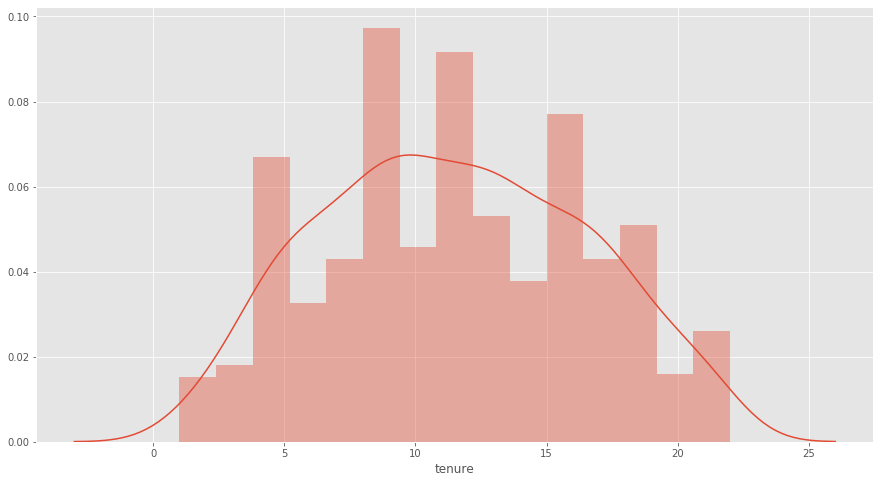

In [44]:
# Distributon of tenure

plt.figure(figsize=(15,8))
sns.distplot(new_cust['tenure'])

# 4. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.<br>For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [41]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


<b>Since both the numbers are same. There are no duplicate records in the dataset.</b>

## 5. Exporting the Cleaned New Customers Data Set to csv

In [42]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)